In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('County_Zhvi_AllHomes_Formatted.csv', na_values=['0.0']) # ZHVI All Homes (SFR, Condo/Co-op) Time Series ($) with ZIP CODE resolution

In [3]:
df

Unnamed: 0  CountyCodeFIPS      RegionName State  \
0            NaN            6037     Los Angeles    CA   
1            1.0           17031            Cook    IL   
2            2.0            4013        Maricopa    AZ   
3            3.0            6073       San Diego    CA   
4            4.0            6059          Orange    CA   
5            5.0           36047           Kings    NY   
6            6.0           12086      Miami-Dade    FL   
7            7.0           48113          Dallas    TX   
8            8.0           36081          Queens    NY   
9            9.0            6065       Riverside    CA   
10          10.0            6071  San Bernardino    CA   
11          11.0           32003           Clark    NV   
12          12.0           53033            King    WA   
13          13.0           26163           Wayne    MI   
14          14.0           48439         Tarrant    TX   
15          15.0            6085     Santa Clara    CA   
16          16.0           12011         Broward    FL   
17          17.0           36061        New York    NY   
18          18.0           42101    Philadelphia    PA   
19          19.0            6001         Alameda    CA   
20          20.0           25017       Middlesex    MA   
21          21.0           36103         Suffolk    NY   
22          22.0            6067      Sacramento    CA   
23          23.0           36059          Nassau    NY   
24          24.0           12099      Palm Beach    FL   
25          25.0           39035        Cuyahoga    OH   
26          26.0           12057    Hillsborough    FL   
27          27.0           42003       Allegheny    PA   
28          28.0           26125         Oakland    MI   
29          29.0           39049        Franklin    OH   
...          ...             ...             ...   ...   
1676      1676.0           56017     Hot Springs    WY   
1677      1677.0           35019       Guadalupe    NM   
1678      1678.0           20119           Meade    KS   
1679      1679.0           40053           Grant    OK   
1680      1680.0           20185        Stafford    KS   
1681      1681.0            8091           Ouray    CO   
1682      1682.0           38069          Pierce    ND   
1683      1683.0           16071          Oneida    ID   
1684      1684.0           20081         Haskell    KS   
1685      1685.0           27125        Red Lake    MN   
1686      1686.0           20093          Kearny    KS   
1687      1687.0           16003           Adams    ID   
1688      1688.0           20141         Osborne    KS   
1689      1689.0           20183           Smith    KS   
1690      1690.0           16061           Lewis    ID   
1691      1691.0           20019      Chautauqua    KS   
1692      1692.0           30097     Sweet Grass    MT   
1693      1693.0           38029          Emmons    ND   
1694      1694.0           20207         Woodson    KS   
1695      1695.0           20165            Rush    KS   
1696      1696.0           20105         Lincoln    KS   
1697      1697.0           20089          Jewell    KS   
1698      1698.0           20047         Edwards    KS   
1699      1699.0           20039         Decatur    KS   
1700      1700.0           20023        Cheyenne    KS   
1701      1701.0           38001           Adams    ND   
1702      1702.0           49033            Rich    UT   
1703      1703.0           20025           Clark    KS   
1704      1704.0           20033        Comanche    KS   
1705      1705.0            6003          Alpine    CA   

                               Metro  SizeRank   1996-04   1996-05   1996-06  \
0     Los Angeles-Long Beach-Anaheim         1  159400.0  159500.0  159200.0   
1                            Chicago         2  128700.0  129000.0  128900.0   
2                            Phoenix         3  107300.0  107400.0  107700.0   
3                          San Diego         4  164700.0  164400.0  164000.0   
4     Los

In [4]:
df.shape

(1706, 264)

In [5]:
len(df.State.unique())

51

In [6]:
zipsPerState = pd.DataFrame(df['State'].groupby(df.State).count())
zipsPerState.sort_values(by='State', inplace=True)
zipsPerState.columns = ['number_of_zips']
zipsPerState.reset_index(inplace=True)

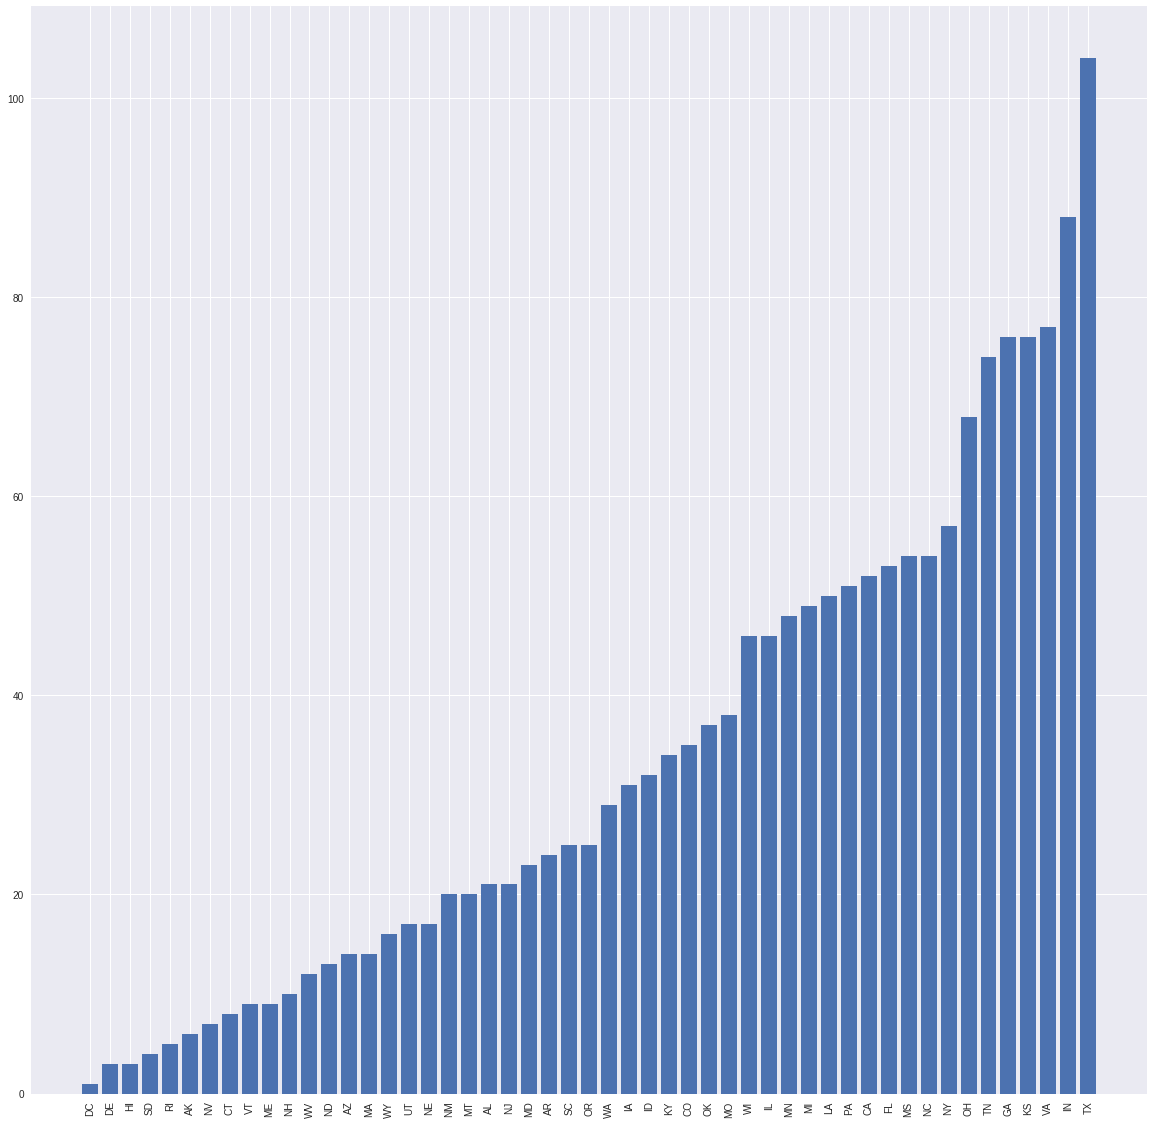

In [7]:
stateIds = [i for i in range(1, len(df.State.unique())+1) ]
plt.figure(figsize=(20,20))
plt.bar(stateIds, zipsPerState['number_of_zips'], align='center')
plt.xticks(stateIds, zipsPerState['State'], rotation='vertical')
plt.show()

In [8]:
dates = df.columns.tolist()[6:]

In [9]:
len(dates) # number of months

258

In [10]:
dates

['1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '1998-12',
 '1999-01',
 '1999-02',
 '1999-03',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '20

In [11]:
len(dates)/12 # number of years

21.5

In [12]:
dfTimeSeries = df[dates]

In [13]:
dfTimeSeries

1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10  \
0     159400.0  159500.0  159200.0  158900.0  158700.0  158600.0  158700.0   
1     128700.0  129000.0  128900.0  128600.0  128400.0  128400.0  128500.0   
2     107300.0  107400.0  107700.0  108200.0  108600.0  108900.0  109200.0   
3     164700.0  164400.0  164000.0  163700.0  163200.0  162900.0  162600.0   
4     199900.0  199900.0  200400.0  201000.0  202200.0  203400.0  203900.0   
5          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6      96000.0   95700.0   95400.0   95400.0   95500.0   95600.0   95700.0   
7          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9     124100.0  123500.0  122900.0  122500.0  122000.0  121600.0  121300.0   
10    101700.0  101800.0  101800.0  101800.0  102200.0  102400.0  102400.0   
11    124600.0  123900.0  123300.0  122900.0  122600.0  122800.0  123000.0   
12    165200.0  165000.0  165100.0  165300.0  165400.0  165500.0  166100.0   
13         NaN   92300.0   92900.0   93700.0   90900.0   86000.0   83600.0   
14         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15    254400.0  254100.0  253900.0  254200.0  254800.0  255800.0  257400.0   
16     86100.0   86200.0   86100.0   85700.0   85500.0   85500.0   85400.0   
17         NaN       NaN  330800.0  375800.0  445200.0  517800.0  589900.0   
18     50000.0   49900.0   49600.0   49400.0   49400.0   49400.0   49300.0   
19    190600.0  190300.0  189900.0  189800.0  190000.0  190100.0  190300.0   
20    173000.0  173200.0  173000.0  172900.0  173200.0  173500.0  173800.0   
21         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22    120900.0  120900.0  121000.0  121000.0  120700.0  120500.0  120700.0   
23    186700.0  186900.0  186900.0  187000.0  186900.0  186500.0  186100.0   
24     98100.0   98200.0   98400.0   98500.0   98800.0   99000.0   99000.0   
25     93700.0   94000.0   94500.0   95100.0   95600.0   95900.0   96300.0   
26     74200.0   74100.0   73800.0   73400.0   72800.0   72400.0   72300.0   
27     69300.0   69600.0   69700.0   70000.0   70300.0   70500.0   70800.0   
28    139100.0  139800.0  140400.0  140900.0  141800.0  142700.0  143200.0   
29     97300.0   97200.0   97300.0   97500.0   97600.0   97700.0   98100.0   
...        ...       ...       ...       ...       ...       ...       ...   
1676       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1677       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1678       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1679   29600.0   30400.0   31100.0   31600.0   32200.0   33200.0   34000.0   
1680       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1681  101100.0   97200.0   94100.0   91800.0   89200.0   86500.0   84700.0   
1682       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1683       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1684       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1685       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1686       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1687       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1688       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1689       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1690  145400.0  145400.0  145400.0  145500.0  145500.0  145500.0  145500.0   
1691       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1692  191900.0  191900.0  191900.0  192000.0  192000.0  192000.0  192000.0   
1693  132900.0  132900.0  132900.0  133000.0  133000.0  133000.0  133000.0   
1694       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1695       NaN       NaN     

In [14]:
print(dfTimeSeries.shape)
dfTimeSeries[dfTimeSeries.isnull().any(axis=1)].shape # 4841 rows - 1/3 of the data set contains at least one null record

(1706, 258)


(667, 258)

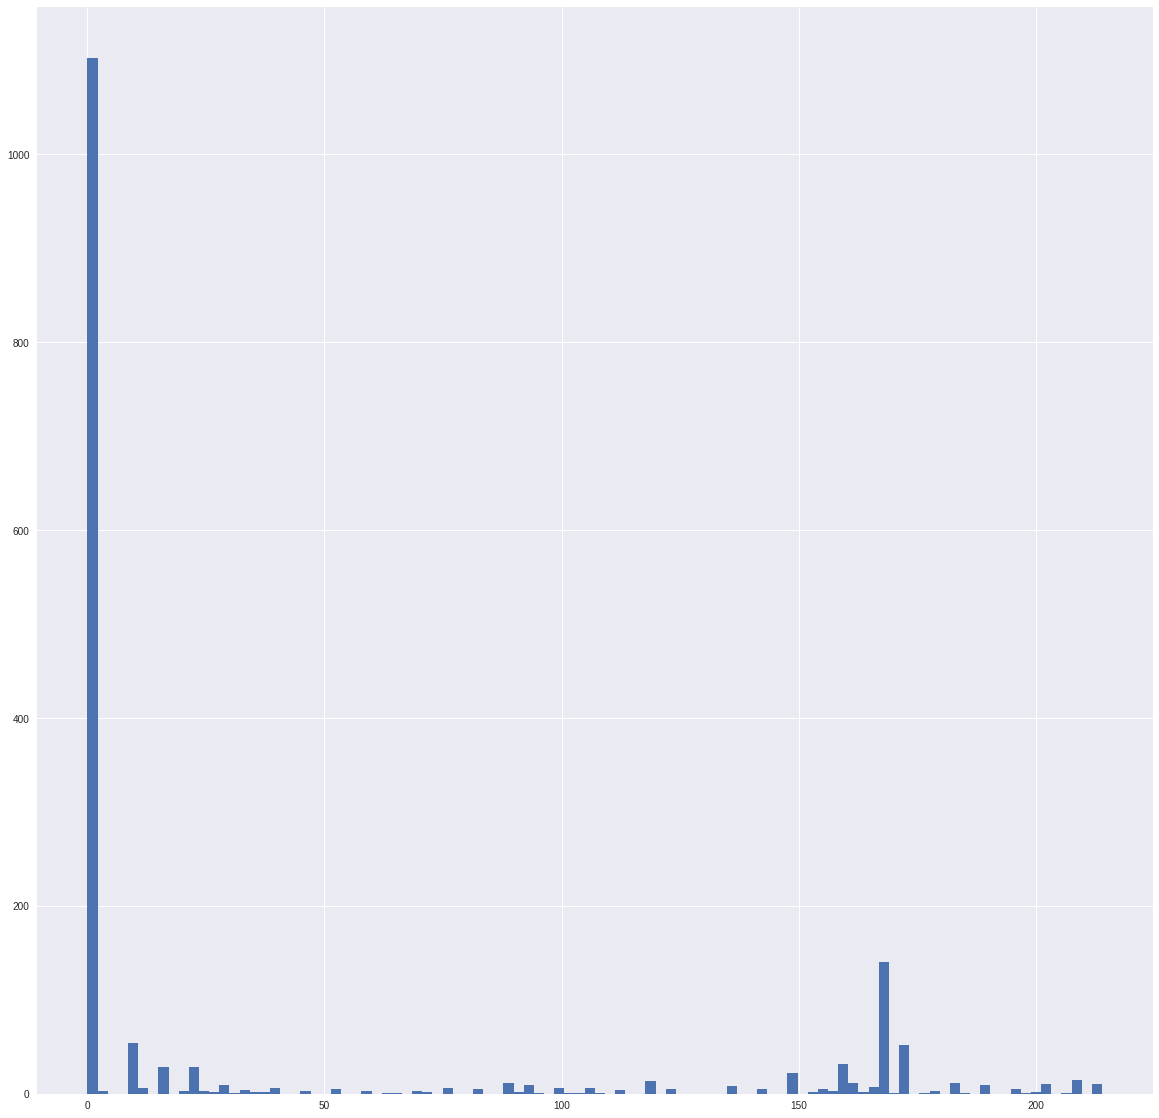

In [15]:
plt.figure(figsize=(20,20))
dfTimeSeries.isnull().sum(axis=1).hist(bins=100) # histogram of nan values contained in each row
# as we can see there are some rows for which 200 time spots are missing... (out of 258).
# but in general its not that bad as in a lot of rows are complete.

In [16]:
dfTimeSeries.describe()

1996-04        1996-05        1996-06        1996-07  \
count    1097.000000    1102.000000    1104.000000    1104.000000   
mean    95294.804011   95538.203267   95820.471014   95889.311594   
std     43362.861271   43237.266338   43730.333669   43939.726230   
min     28100.000000   28800.000000   29100.000000   29200.000000   
25%     65700.000000   65900.000000   65900.000000   65900.000000   
50%     85000.000000   85400.000000   85550.000000   85600.000000   
75%    114500.000000  115000.000000  115075.000000  114825.000000   
max    328600.000000  327500.000000  330800.000000  375800.000000   

             1996-08        1996-09        1996-10        1996-11  \
count    1105.000000    1105.000000    1105.000000    1105.000000   
mean    96028.235294   96196.561086   96409.411765   96645.520362   
std     44358.064221   44925.930456   45601.333073   46285.224349   
min     28900.000000   29200.000000   29900.000000   29300.000000   
25%     66000.000000   66000.000000   66100.000000   66200.000000   
50%     86100.000000   86400.000000   86500.000000   86500.000000   
75%    115200.000000  115300.000000  116000.000000  116000.000000   
max    445200.000000  517800.000000  589900.000000  652100.000000   

             1996-12        1997-01      ...            2016-12       2017-01  \
count    1105.000000    1107.000000      ...       1.689000e+03  1.706000e+03   
mean    96904.343891   97293.857272      ...       1.652089e+05  1.657686e+05   
std     46801.278735   47003.123268      ...       1.119549e+05  1.120830e+05   
min     28500.000000   27800.000000      ...       4.900000e+04  4.910000e+04   
25%     66300.000000   67050.000000      ...       1.038000e+05  1.044000e+05   
50%     86600.000000   86900.000000      ...       1.359000e+05  1.362000e+05   
75%    116400.000000  117100.000000      ...       1.898000e+05  1.907250e+05   
max    692500.000000  703200.000000      ...       1.398100e+06  1.394600e+06   

            2017-02       2017-03       2017-04       2017-05       2017-06  \
count  1.706000e+03  1.706000e+03  1.706000e+03  1.706000e+03  1.706000e+03   
mean   1.665404e+05  1.672440e+05  1.679493e+05  1.687275e+05  1.695249e+05   
std    1.126152e+05  1.131820e+05  1.139602e+05  1.148851e+05  1.157932e+05   
min    4.730000e+04  4.520000e+04  4.390000e+04  4.310000e+04  4.230000e+04   
25%    1.044500e+05  1.047500e+05  1.049000e+05  1.053250e+05  1.058500e+05   
50%    1.367000e+05  1.375500e+05  1.381500e+05  1.386500e+05  1.395000e+05   
75%    1.925750e+05  1.932250e+05  1.946500e+05  1.956500e+05  1.972500e+05   
max    1.390200e+06  1.390600e+06  1.399600e+06  1.407800e+06  1.404800e+06   

            2017-07       2017-08       2017-09  
count  1.706000e+03  1.706000e+03  1.706000e+03  
mean   1.702591e+05  1.708903e+05  1.713292e+05  
std    1.166131e+05  1.173999e+05  1.179372e+05  
min    4.170000e+04  4.130000e+04  4.100000e+04  
25%    1.066000e+05  1.067250e+05  1.068250e+05  
50%    1.404000e+05  1.407000e+05  1.411500e+05  
75%    1.984000e+05  1.990000e+05  1.986750e+05  
max    1.395200e+06  1.440200e+06  1.450300e+06  

[8 rows x 258 columns]

In [17]:
dfTimeSeries.max().max()

1501300.0

In [18]:
dfTimeSeries.min().min()

27000.0

In [19]:
dfTimeSeries.values

array([[ 159400.,  159500.,  159200., ...,  568200.,  571400.,  574400.],
       [ 128700.,  129000.,  128900., ...,  214000.,  215100.,  215900.],
       [ 107300.,  107400.,  107700., ...,  244800.,  245900.,  246900.],
       ..., 
       [     nan,      nan,      nan, ...,   65400.,   65700.,   66000.],
       [     nan,      nan,      nan, ...,   56900.,   57100.,   57000.],
       [     nan,      nan,      nan, ...,  266200.,  258400.,  256900.]])

In [20]:
dfTimeSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Columns: 258 entries, 1996-04 to 2017-09
dtypes: float64(222), int64(36)
memory usage: 3.4 MB


In [23]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [24]:
dfTimeSeries.stack().describe()

count    367527
mean     142035
std       90337
min       27000
25%       87900
50%      119800
75%      165300
max     1501300
dtype: float64